In [541]:
import pandas as pd

In [542]:
# df_poblacion = pd.read_csv("Data/state-population.csv", sep=",")
df_poblacion = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv", sep=",")
df_poblacion.head(2)

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0


In [543]:
df_poblacion.tail(2)

,state/region,ages,year,population
2542,USA,under18,2012,73708179.0
2543,USA,total,2012,313873685.0


In [544]:
df_poblacion[20:30].head()

,state/region,ages,year,population
20,AL,total,2003,4503491.0
21,AL,under18,2003,1113083.0
22,AL,total,2001,4467634.0
23,AL,under18,2001,1120409.0
24,AL,total,2002,4480089.0


In [545]:
df_poblacion[["ages", "year"]].head()

,ages,year
0,under18,2012
1,total,2012
2,under18,2010
3,total,2010
4,under18,2011


In [546]:
df_poblacion.rename(columns={"state/region": "state_region"}, inplace=True)
df_poblacion.head()

,state_region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [547]:
df_poblacion["year"].describe().round(0)

count    2544.0
mean     2002.0
std         7.0
min      1990.0
25%      1996.0
50%      2002.0
75%      2007.0
max      2013.0
Name: year, dtype: float64

In [548]:
df_poblacion["population"].describe().round(0)

count         2524.0
mean       6805558.0
std       28550145.0
min         101309.0
25%         742380.0
50%        1597005.0
75%        4547104.0
max      316128839.0
Name: population, dtype: float64

<Axes: >

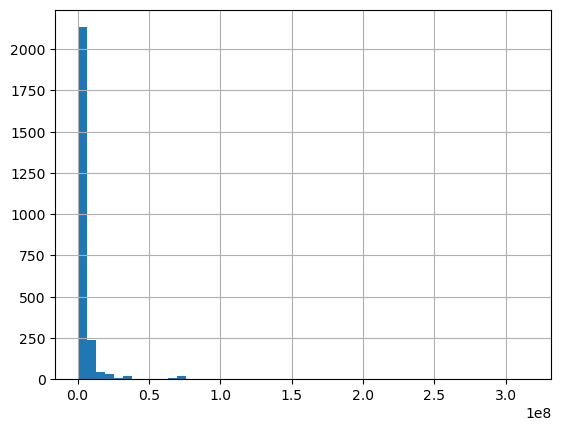

In [549]:
df_poblacion["population"].hist(bins=50)

In [550]:
df_poblacion["state_region"].value_counts().head()

state_region
AL    48
NE    48
NH    48
NJ    48
NM    48
Name: count, dtype: int64

In [551]:
print("Media:", df_poblacion["population"].mean())
print("Desviacion estandar:", df_poblacion["population"].std())
print("Mediana:",df_poblacion["population"].median())
print("Quantile:",df_poblacion["population"].quantile(0.98))

Media: 6805558.401347068
Desviacion estandar: 28550144.966823243
Mediana: 1597005.0
Quantile: 37514544.19999999


In [552]:
df_poblacion.set_index("state_region").loc["AL"].head(2)

,ages,year,population
state_region,,,
AL,under18,2012,1117489.0
AL,total,2012,4817528.0


In [553]:
df_poblacion.set_index("state_region").query("year==2013 & ages=='total'").head()

,ages,year,population
state_region,,,
AL,total,2013,4833722.0
AK,total,2013,735132.0
AZ,total,2013,6626624.0
AR,total,2013,2959373.0
CA,total,2013,38332521.0


<Axes: xlabel='state_region'>

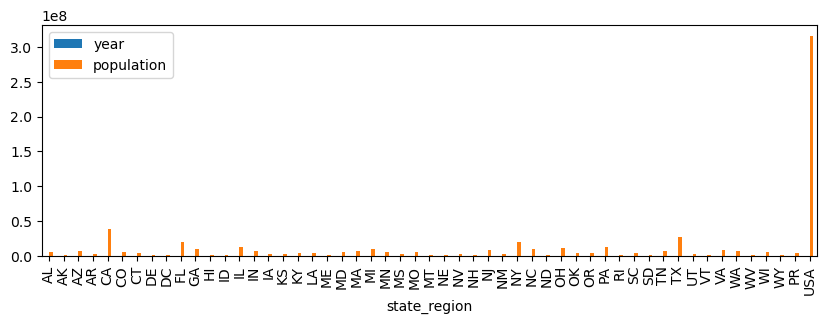

In [554]:
df_poblacion.set_index("state_region").query("year==2013 & ages=='total'").plot.bar(figsize=(10,3))

In [555]:
df_poblacion.query("year==2013 & ages=='total'")["population"].mean()

11997599.320754716

In [556]:
df_poblacion = df_poblacion[df_poblacion["state_region"] != "USA"]

<Axes: xlabel='state_region'>

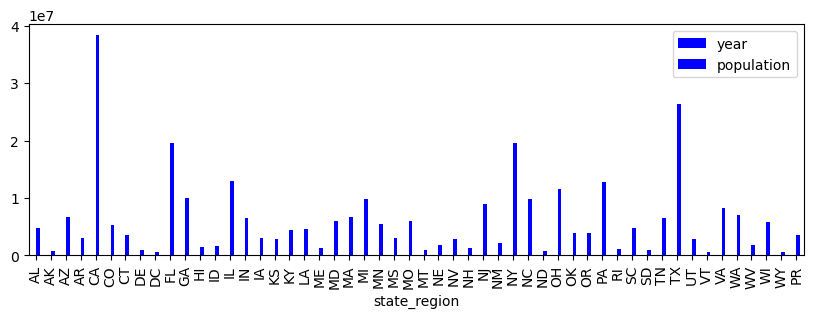

In [557]:
df_poblacion.set_index("state_region").query("year==2013 & ages=='total'").plot.bar(figsize=(10,3), color="blue")

<Axes: >

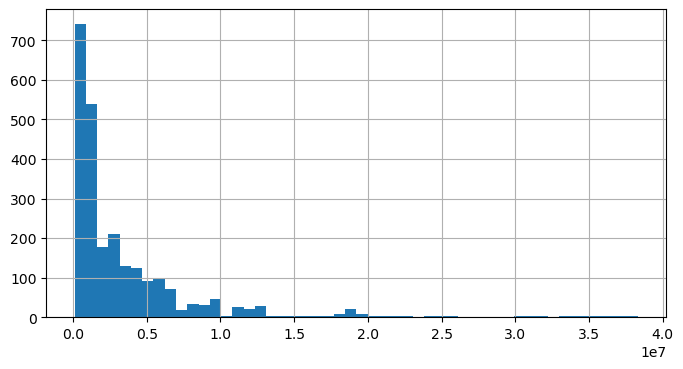

In [558]:
df_poblacion["population"].hist(bins=50, figsize=(8,4))

<Axes: xlabel='year'>

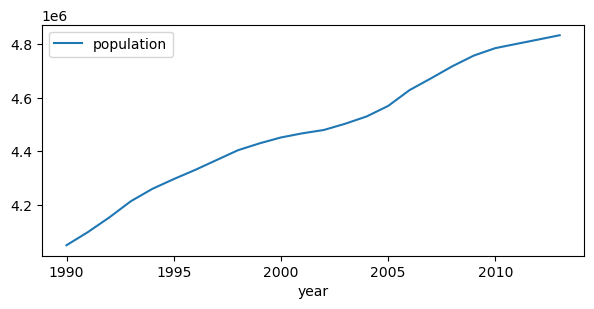

In [559]:
df_poblacion.query("state_region=='AL' & ages=='total'")[["year","population"]].sort_values("year").set_index("year").plot(figsize=(7,3))

<Axes: xlabel='year'>

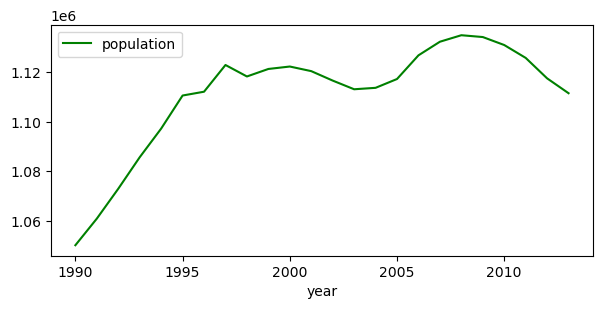

In [560]:
df_poblacion.query("state_region=='AL' & ages=='under18'")[["year","population"]].sort_values("year").set_index("year").plot(figsize=(7,3), color="green")

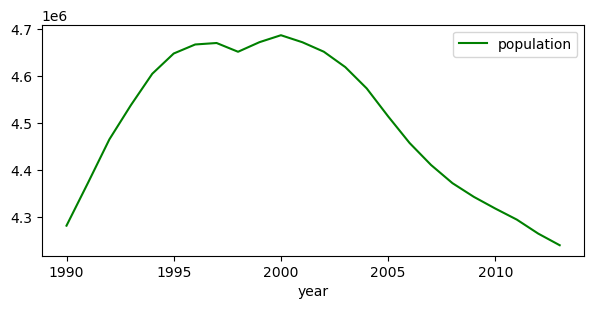

In [561]:
def plot_pop_time(df, state, ages_type):
    df.query(f"state_region=='{state}' & ages=='{ages_type}'")[["year","population"]].sort_values("year").set_index("year").plot(figsize=(7,3), color="green")


state = "NY"
ages_type = "under18"
plot_pop_time(df_poblacion, state, ages_type)

In [562]:
df_total = df_poblacion[df_poblacion["ages"] == "total"]
df_total.shape

(1248, 4)

<Axes: >

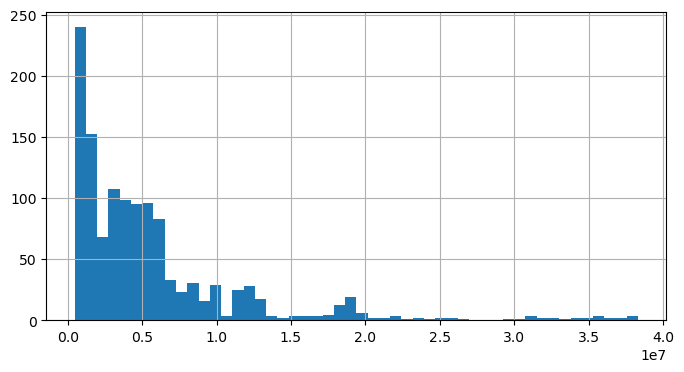

In [563]:
df_total["population"].hist(bins=50, figsize=(8,4))

In [564]:
df_poblacion.groupby(["ages", "state_region"])["population"].sum()

ages     state_region
total    AK               15508916.0
         AL              107628669.0
         AR               64636264.0
         AZ              127070396.0
         CA              824019294.0
                            ...     
under18  VT                3381874.0
         WA               35829119.0
         WI               32265466.0
         WV                9718002.0
         WY                3173881.0
Name: population, Length: 104, dtype: float64

In [565]:
df_total.query("year==2013")[["year", "population"]].sort_values("population", ascending=False).head(3)

,year,population
199,2013,38332521.0
2103,2013,26448193.0
1544,2013,19651127.0


In [566]:
df_total.query("ages=='total'")[["year", "population"]].sort_values("population", ascending=False).head(3)

,year,population
199,2013,38332521.0
193,2012,37999878.0
195,2011,37668681.0


In [567]:
df_areas = pd.read_csv("Dia_1/Data/state-areas.csv", sep=",")
df_areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [568]:
df_ab = pd.read_csv("Dia_1/Data/state-abbrevs.csv", sep=",")
df_ab.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [569]:
df = pd.merge(df_poblacion, df_ab, left_on="state_region", right_on="abbreviation")
df.head()

,state_region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [570]:
df1 = pd.merge(df, df_areas, on="state") 
df1.head(5)

,state_region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423
1,AL,total,2012,4817528.0,Alabama,AL,52423
2,AL,under18,2010,1130966.0,Alabama,AL,52423
3,AL,total,2010,4785570.0,Alabama,AL,52423
4,AL,under18,2011,1125763.0,Alabama,AL,52423


In [571]:
del(df1["abbreviation"])
df1.rename(columns={"area (sq. mi)": "area"}, inplace=True)
df1.head()

,state_region,ages,year,population,state,area
0,AL,under18,2012,1117489.0,Alabama,52423
1,AL,total,2012,4817528.0,Alabama,52423
2,AL,under18,2010,1130966.0,Alabama,52423
3,AL,total,2010,4785570.0,Alabama,52423
4,AL,under18,2011,1125763.0,Alabama,52423
